In [25]:
#All imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import preprocessing

# I) DATA EXPLORATION

In [26]:
import pandas as pd

# Load the dataset
file_path = 'stroke_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "Head": data.head(),
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum(),
    "Data Types": data.dtypes
}

data_info

{'Head':       id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 'Shape': (5110, 12),
 'Col

Basic Overview of the Raw Dataset:
    
1)Shape:
The dataset contains 5,110 rows and 12 columns.

2)Sample Data:
A quick look at the first five rows shows features such as gender, age, hypertension, heart_disease, bmi, and the target variable stroke.

3)MISSING VALUES:
The bmi column has 201 missing values, which we need to address later.


In [27]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [36]:
#Evaluation the uniqueness of the id, to see if we do have any patient present with multiple row data 
data['id'].nunique()

5110

In [38]:
data ['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [40]:
data[data['gender'] == 'Other']

id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

In [46]:
#Let's see the percentage of male and female in the dataset

In [45]:
gender_percentage = data['gender'].value_counts(normalize = True)*100
gender_percentage

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

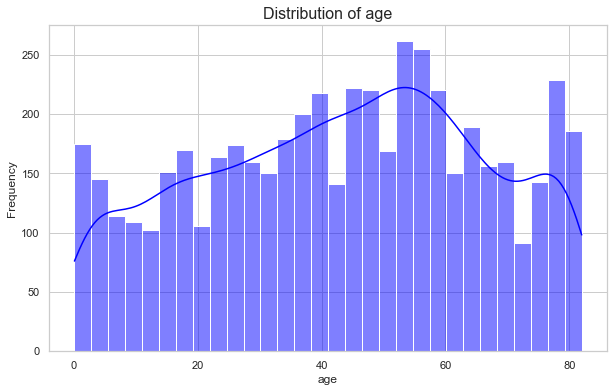

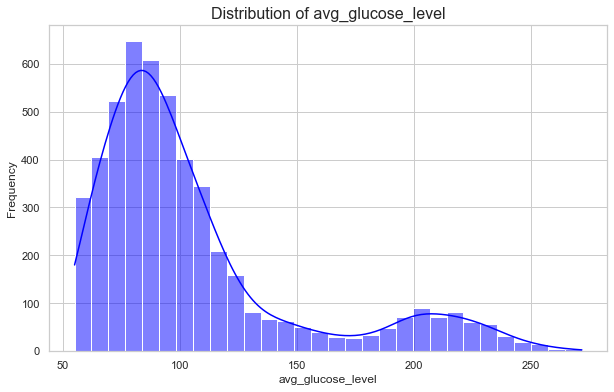

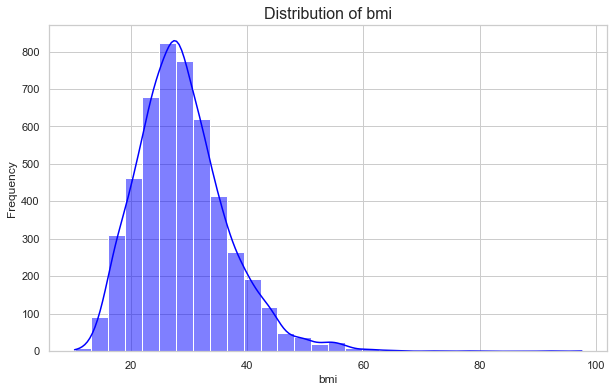

In [10]:
# Distribution of numerical features
def plot_numerical_distributions(data, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {col}", fontsize=16)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
plot_numerical_distributions(data, ['age', 'avg_glucose_level', 'bmi'])



Numerical Feature Distributions:

1) Age:
The distribution is slightly right-skewed.
Most patients are between 0 and 80 years old, with a few outliers above 80.

2)Average Glucose Level:
A wide range of values, with some extreme outliers at the higher end.
Indicates significant variation in glucose levels.

3) BMI:
The distribution is approximately normal, but there are missing values (gaps in the histogram)--> We'll handle these missing data later on

In [50]:
# Function to summarize statistics for each column
def summarize_data(data):
    summary = []
    for col in data.columns:
        col_data = data[col]
        unique_values = col_data.nunique()
        col_type = col_data.dtype
        if col_type in ['int64', 'float64']:  # Numeric columns
            mean_val = col_data.mean()
            median_val = col_data.median()
            summary.append({
                "Column": col,
                "Type": "Numeric",
                "Unique Values": unique_values,
                "Mean": mean_val,
                "Median": median_val,
                "Categories/Values": "N/A"
            })
        else:  # Categorical or object columns
            categories = col_data.unique()
            summary.append({
                "Column": col,
                "Type": "Categorical",
                "Unique Values": unique_values,
                "Mean": "N/A",
                "Median": "N/A",
                "Categories/Values": categories
            })
    return pd.DataFrame(summary)

# Summarize the dataset 
data_summary_updated = summarize_data(data)
data_summary_updated

Column         Type  Unique Values          Mean   Median  \
0                  id      Numeric           5110  36517.829354  36932.0   
1              gender  Categorical              3           N/A      N/A   
2                 age      Numeric            104     43.226614     45.0   
3        hypertension      Numeric              2      0.097456      0.0   
4       heart_disease      Numeric              2      0.054012      0.0   
5        ever_married  Categorical              2           N/A      N/A   
6           work_type  Categorical              5           N/A      N/A   
7      Residence_type  Categorical              2           N/A      N/A   
8   avg_glucose_level      Numeric           3979    106.147677   91.885   
9                 bmi      Numeric            418     28.893237     28.1   
10     smoking_status  Categorical              4           N/A      N/A   
11             stroke      Numeric              2      0.048728      0.0   

                                    Categories/Values  
0                                                 N/A  
1                               [Male, Female, Other]  
2                                                 N/A  
3                                                 N/A  
4                                                 N/A  
5                                           [Yes, No]  
6   [Private, Self-employed, Govt_job, children, N...  
7                                      [Urban, Rural]  
8                                                 N/A  
9                                                 N/A  
10   [formerly smoked, never smoked, smokes, Unknown]  
11                                                N/A

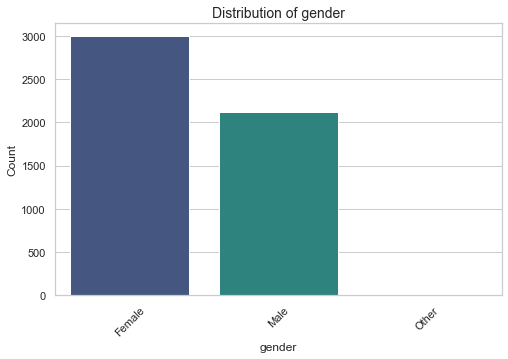

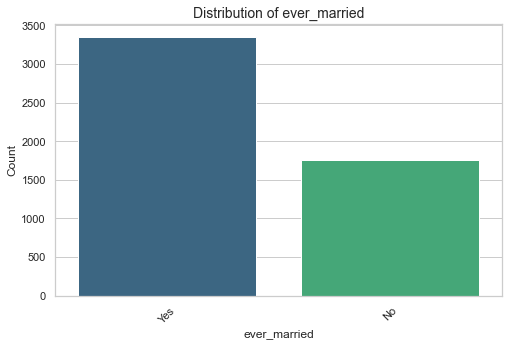

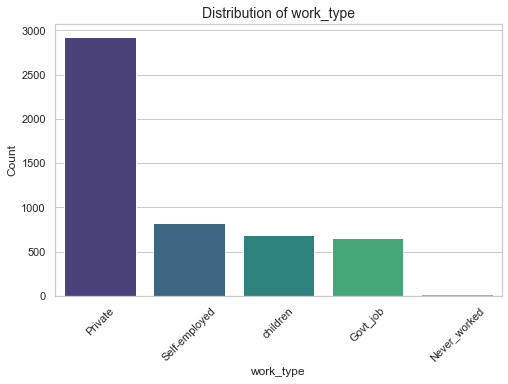

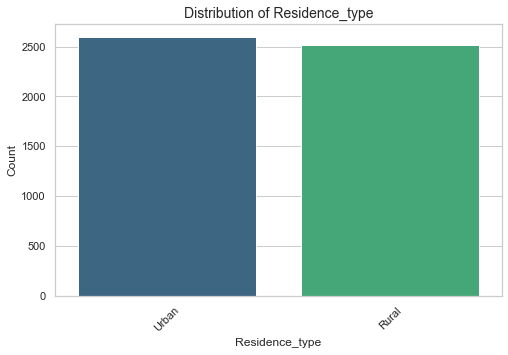

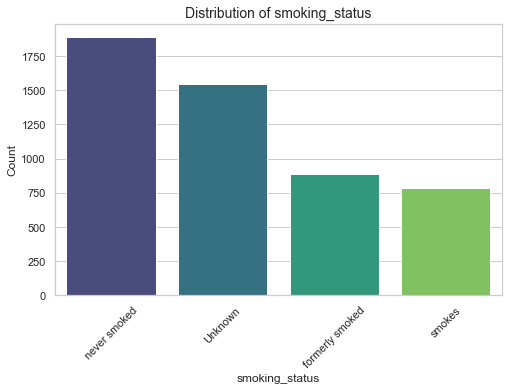

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set general plot style
sns.set(style="whitegrid")

# Function to plot distributions of categorical features
def plot_categorical_distributions(data, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=data, x=col, palette="viridis", order=data[col].value_counts().index)
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()

# Categorical columns to analyze
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot distributions
plot_categorical_distributions(data, categorical_columns)

Observations on Categorical Features:

1-Gender:
Most patients are either "Male" or "Female," with very few labeled as "Other." (actually only one is labeled "Other")

2-Ever Married:
Majority of patients are married, with "Yes" significantly outweighing "No."

3-Work Type:
Most patients are in "Private" jobs, followed by "Self-employed."

4-Very few are "Never worked" or "Children."

5-Residence Type:
Fairly balanced between "Urban" and "Rural."

6-Smoking Status:
A significant portion of data falls into the "Unknown" category, which may need special handling.

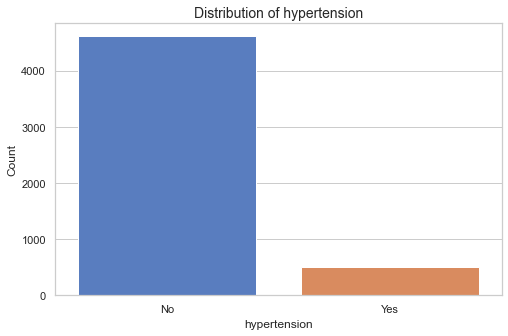

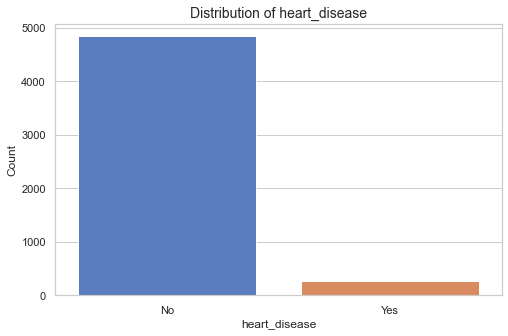

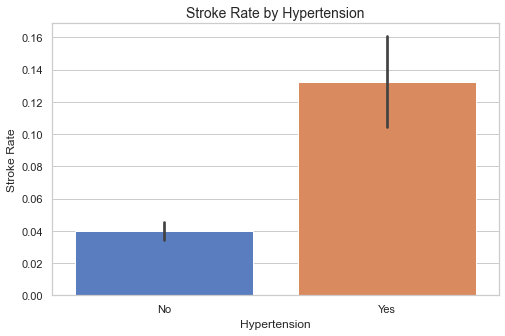

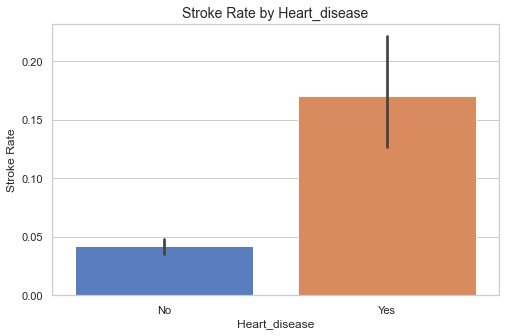

In [53]:
# Visualizing the distribution of 'hypertension' and 'heart_disease'
def plot_binary_distributions(data, binary_columns):
    for col in binary_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=data, x=col, palette="muted")
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()
        
# Relationship with 'stroke'
def plot_binary_vs_stroke(data, binary_columns):
    for col in binary_columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=col, y='stroke', data=data, palette="muted")
        plt.title(f"Stroke Rate by {col.capitalize()}", fontsize=14)
        plt.ylabel("Stroke Rate")
        plt.xlabel(col.capitalize())
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()

# Columns to analyze
binary_columns = ['hypertension', 'heart_disease']

# Plot distributions and relationship with stroke
plot_binary_distributions(data, binary_columns)
plot_binary_vs_stroke(data, binary_columns)


Insights on Binary Variables:

1-Hypertension:
Majority of patients do not have hypertension.
Patients with hypertension show a higher stroke rate than those without.


2-Heart Disease:
A small proportion of patients have heart disease.
Those with heart disease have a notably higher stroke rate compared to those without.


Both variables are significant risk factors for stroke, as indicated by the higher stroke rates among affected individuals.

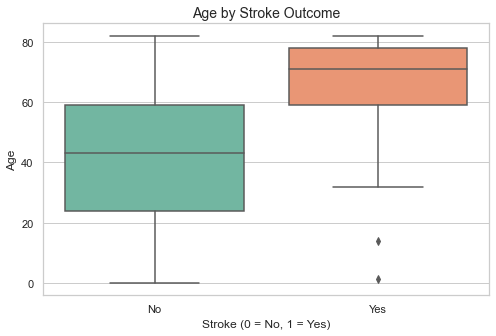

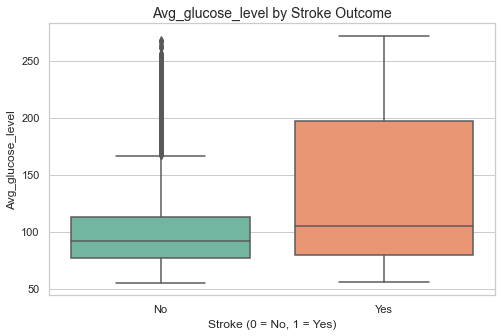

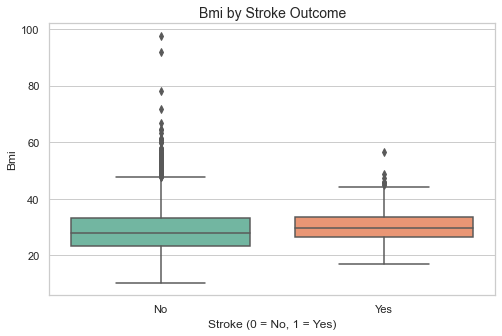

In [54]:
#Let’s begin with the numerical features and their relationship to stroke.

# Visualizing relationships between numerical features and the target variable 'stroke'
def plot_numerical_vs_stroke(data, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, x='stroke', y=col, palette="Set2")
        plt.title(f"{col.capitalize()} by Stroke Outcome", fontsize=14)
        plt.ylabel(col.capitalize())
        plt.xlabel("Stroke (0 = No, 1 = Yes)")
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()

# Numerical columns to analyze
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Plot relationships
plot_numerical_vs_stroke(data, numerical_columns)



Insights on Numerical Features and Stroke:

1-Age:
Patients who had a stroke are generally older compared to those who did not.
The median age for stroke cases is significantly higher.

2-Average Glucose Level:
Stroke patients tend to have higher glucose levels on average.
There is a wider range of glucose levels among stroke cases.

3-BMI:
No significant difference in the median BMI between stroke and non-stroke groups.
However, outliers with high BMI are observed in both groups.

In [55]:
# # analyzing the relationship between categorical features (e.g., gender, work_type, etc.) and stroke

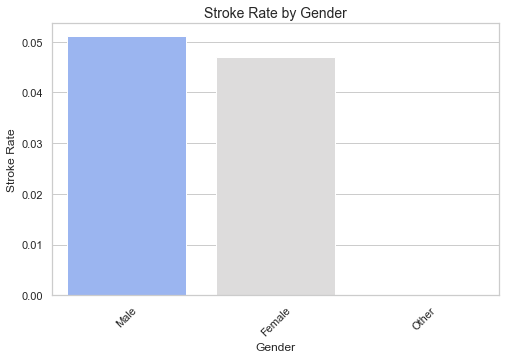

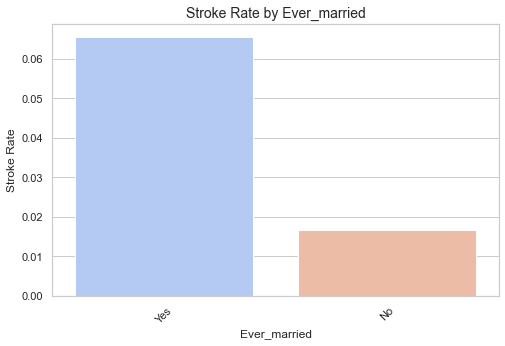

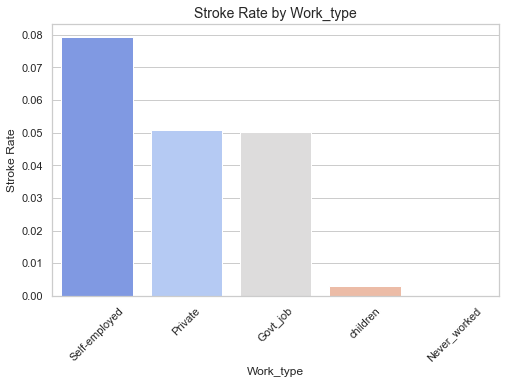

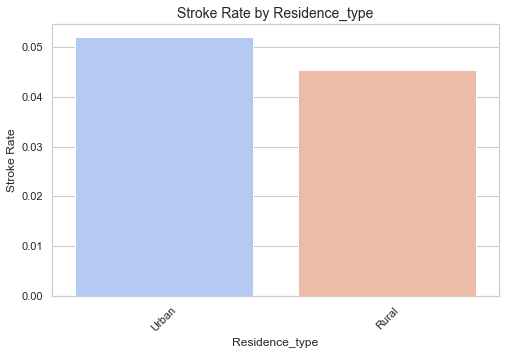

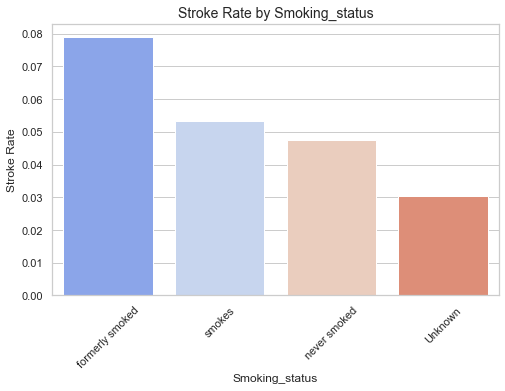

In [56]:
# Visualizing relationships between categorical features and the target variable 'stroke'
def plot_categorical_vs_stroke(data, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        stroke_rates = data.groupby(col)['stroke'].mean().sort_values(ascending=False)
        sns.barplot(x=stroke_rates.index, y=stroke_rates.values, palette="coolwarm")
        plt.title(f"Stroke Rate by {col.capitalize()}", fontsize=14)
        plt.ylabel("Stroke Rate")
        plt.xlabel(col.capitalize())
        plt.xticks(rotation=45)
        plt.show()

# Categorical columns to analyze
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot relationships
plot_categorical_vs_stroke(data, categorical_columns)


Insights on Categorical Features and Stroke:

1-Gender:
No significant difference in stroke rates between males and females.
Very few patients are categorized as "Other," making it hard to draw conclusions for this group.

2-Ever Married:
Patients who are married have a noticeably higher stroke rate compared to those who are not married.

3-Work Type:
The highest stroke rate is observed in patients who have never worked.
Self-employed individuals also show a slightly elevated stroke risk compared to those in private or government jobs.

4-Residence Type:
Stroke rates are fairly balanced between urban and rural residents.

5-Smoking Status:
Patients who smoke or formerly smoked exhibit higher stroke rates.
The "Unknown" category still holds a large portion of the data and could introduce uncertainty.

# II)  QUERIES

In [57]:
# Query 1: Percentage of stroke patients with hypertension
hypertension_stroke_rate = data[data['stroke'] == 1]['hypertension'].mean() * 100

# Query 2: Stroke rate by age group
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
stroke_by_age_group = data.groupby('age_group')['stroke'].mean() * 100

# Query 3: Stroke rate by smoking status
stroke_by_smoking_status = data.groupby('smoking_status')['stroke'].mean() * 100

# Query 4: Percentage of stroke patients with both hypertension and heart disease
stroke_combined_conditions = len(data[(data['stroke'] == 1) & (data['hypertension'] == 1) & (data['heart_disease'] == 1)]) / len(data[data['stroke'] == 1]) * 100

# Query 5: Stroke risk by work type
stroke_by_work_type = data.groupby('work_type')['stroke'].mean() * 100

# Display results
query_results = {
    "Hypertension Stroke Rate (%)": hypertension_stroke_rate,
    "Stroke Rate by Age Group (%)": stroke_by_age_group,
    "Stroke Rate by Smoking Status (%)": stroke_by_smoking_status,
    "Stroke Rate with Both Conditions (%)": stroke_combined_conditions,
    "Stroke Rate by Work Type (%)": stroke_by_work_type
}

query_results


{'Hypertension Stroke Rate (%)': 26.506024096385545,
 'Stroke Rate by Age Group (%)': age_group
 0-20       0.195122
 21-40      0.492207
 41-60      4.097311
 61-80     12.962963
 81-100    19.827586
 Name: stroke, dtype: float64,
 'Stroke Rate by Smoking Status (%)': smoking_status
 Unknown            3.044041
 formerly smoked    7.909605
 never smoked       4.756871
 smokes             5.323194
 Name: stroke, dtype: float64,
 'Stroke Rate with Both Conditions (%)': 5.220883534136546,
 'Stroke Rate by Work Type (%)': work_type
 Govt_job         5.022831
 Never_worked     0.000000
 Private          5.094017
 Self-employed    7.936508
 children         0.291121
 Name: stroke, dtype: float64}

1-Hypertension and Stroke:
26.51% of stroke patients have hypertension, highlighting its significant role as a risk factor.

2-Age Groups and Stroke:
   -Stroke rates increase with age:
    0–20 years: 0.20%
    21–40 years: 0.49%
    41–60 years: 4.10%
    61–80 years: 12.96%
    81–100 years: 19.83%
        
3-Smoking Status and Stroke:

    -Stroke rates by smoking status:
        Unknown: 3.04%
        Formerly smoked: 7.91%
        Never smoked: 4.76%
        Smokes: 5.32%
            
4-Combined Health Conditions:
    5.22% of stroke patients have both hypertension and heart disease, indicating the compounded risk of these conditions.

5- Work Type and Stroke Risk:
    Stroke rates by work type:
        Government job: 5.02%
        Never worked: 0%
        Private: 5.09%
        Self-employed: 7.94%
        Children: 0.29%

# III) Data Cleaning and Feature Engineering

In [58]:
#first Step : 

#Analyzing the missing values in the bmi column.
#Choosing an appropriate imputation strategy (e.g., median, mean, or other methods) based on the distribution of bmi.
#Imputing the missing value

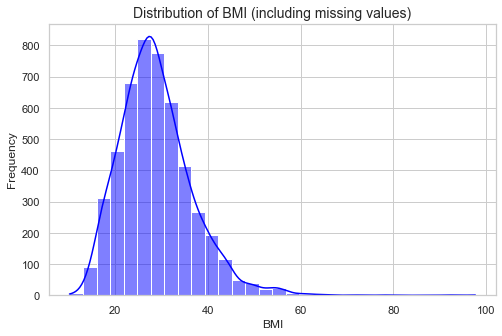

(201, 3.9334637964774952)

In [59]:
# Visualizing the distribution of BMI (including missing values)
plt.figure(figsize=(8, 5))
sns.histplot(data['bmi'], kde=True, bins=30, color='blue')
plt.title("Distribution of BMI (including missing values)", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# Analyzing missing values in 'bmi'
missing_bmi = data['bmi'].isnull().sum()
missing_bmi_percentage = (missing_bmi / len(data)) * 100

missing_bmi, missing_bmi_percentage


Analysis of Missing Values in BMI:

Missing Count:
201 rows have missing BMI values.

Percentage:
This accounts for approximately 3.93% of the dataset.

Distribution:
The distribution of BMI (excluding missing values) appears approximately normal

In [60]:
# Imputing missing values in 'bmi' with the median
bmi_median = data['bmi'].median()
data['bmi'].fillna(bmi_median, inplace=True)

# Verifying that there are no more missing values in 'bmi'
missing_bmi_after = data['bmi'].isnull().sum()
missing_bmi_after


0

In [62]:
# Dropping the 'id' column as it is irrelevant for prediction
data.drop(columns=['id'], inplace=True)

# Confirming the column removal
data.columns.tolist()


['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'age_group']

In [63]:
# Encoding categorical variables using one-hot encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Confirming the new encoded columns
data_encoded.columns.tolist()


['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'age_group_21-40',
 'age_group_41-60',
 'age_group_61-80',
 'age_group_81-100']

In [64]:
data_encoded

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21  28.1       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75  28.1       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            True         False              True                   False   
1           False         False              True                   False   
2            True         False              True                   False   
3           False         False              True                   False   
4           False         False              True                   False   
...           ...           ...               ...                     ...   
5105        False         False              True                   False   
5106        False         False              True                   False   
5107        False         False              True                   False   
5108         True         False              True                   False   
5109        False         False              True                   False   

      ...  work_type_Self-employed  work_type_children  Residence_type_Urban  \
0     ...                    False               False                  True   
1     ...                     True               False                 False   
2     ...                    False               False                 False   
3     ...                    False               False                  True   
4     ...                     True               False                 False   
...   ...                      ...                 ...                   ...   
5105  ...                    False               False                  True   
5106  ...                     True               False                  True   
5107  ...                     True               False                 False   
5108  ...                    False               False                 False   
5109  ...                    False               False                  True   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                               True                        False   
1                              False                         True   
2                              False                         True   
3                              False                        False   
4                              False                         True   
...                              ...                          ...   
5105                           False                         True   
5106                           False                         True   
5107                           False                         True   
5108                            True                        False   
5109                           False                        False   

      smoking_status_smokes  age_group_21-40  age_group_41-60  \
0                     False            False            False   
1                     False            False            False   
2                     False            False            False   
3                      True            False             True   
4                     False            False          

In [65]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Initializing the scaler
scaler = StandardScaler()

# Scaling the numerical features
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Checking scaled values
data_encoded[numerical_features].describe()


age  avg_glucose_level           bmi
count  5.110000e+03       5.110000e+03  5.110000e+03
mean   5.005781e-17       1.001156e-16 -4.449583e-17
std    1.000098e+00       1.000098e+00  1.000098e+00
min   -1.908261e+00      -1.126958e+00 -2.411027e+00
25%   -8.061152e-01      -6.383223e-01 -6.575089e-01
50%    7.843218e-02      -3.149945e-01 -9.898092e-02
75%    7.860701e-01       1.754080e-01  5.115031e-01
max    1.714845e+00       3.657145e+00  8.928390e+00

The numerical features (age, avg_glucose_level, bmi) have been successfully scaled using standardization,
with a mean of 0 and a standard deviation of 1.
This ensures that these features are on a comparable scale

In [69]:
data_encoded
#it seems that we have to convert the categorical data into boolean (numerical)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     1.051434             0              1           2.706375  1.005086   
1     0.786070             0              0           2.121559 -0.098981   
2     1.626390             0              1          -0.005028  0.472536   
3     0.255342             0              0           1.437358  0.719327   
4     1.582163             1              0           1.501184 -0.631531   
...        ...           ...            ...                ...       ...   
5105  1.626390             1              0          -0.494658 -0.098981   
5106  1.670617             0              0           0.420775  1.446713   
5107 -0.363842             0              0          -0.511443  0.225745   
5108  0.343796             0              0           1.328257 -0.423706   
5109  0.034205             0              0          -0.460867 -0.345772   

      stroke  gender_Male  gender_Other  ever_married_Yes  \
0          1            1             0                 1   
1          1            0             0                 1   
2          1            1             0                 1   
3          1            0             0                 1   
4          1            0             0                 1   
...      ...          ...           ...               ...   
5105       0            0             0                 1   
5106       0            0             0                 1   
5107       0            0             0                 1   
5108       0            1             0                 1   
5109       0            0             0                 1   

      work_type_Never_worked  ...  work_type_Self-employed  \
0                          0  ...                        0   
1                          0  ...                        1   
2                          0  ...                        0   
3                          0  ...                        0   
4                          0  ...                        1   
...                      ...  ...                      ...   
5105                       0  ...                        0   
5106                       0  ...                        1   
5107                       0  ...                        1   
5108                       0  ...                        0   
5109                       0  ...                        0   

      work_type_children  Residence_type_Urban  \
0                      0                     1   
1                      0                     0   
2                      0                     0   
3                      0                     1   
4                      0                     0   
...                  ...                   ...   
5105                   0                     1   
5106                   0                     1   
5107                   0                     0   
5108                   0                     0   
5109                   0                     1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                  1                            0   
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
5109                               0                            0   

      smoking_status_smokes  age_group_21-40  age_group_41-60  \
0                         0                0                0   
1                         0                0                

In [67]:
# Convert "True" and "False" to 1 and 0 if any exist in the dataset
data_encoded = data_encoded.replace({True: 1, False: 0})

# Verify if any non-numeric values remain in the dataset
non_numeric_columns = data_encoded.select_dtypes(include=['object']).columns.tolist()

# Display the non-numeric columns to ensure everything is numerical now
non_numeric_columns


[]

In [68]:
data_encoded

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     1.051434             0              1           2.706375  1.005086   
1     0.786070             0              0           2.121559 -0.098981   
2     1.626390             0              1          -0.005028  0.472536   
3     0.255342             0              0           1.437358  0.719327   
4     1.582163             1              0           1.501184 -0.631531   
...        ...           ...            ...                ...       ...   
5105  1.626390             1              0          -0.494658 -0.098981   
5106  1.670617             0              0           0.420775  1.446713   
5107 -0.363842             0              0          -0.511443  0.225745   
5108  0.343796             0              0           1.328257 -0.423706   
5109  0.034205             0              0          -0.460867 -0.345772   

      stroke  gender_Male  gender_Other  ever_married_Yes  \
0          1            1             0                 1   
1          1            0             0                 1   
2          1            1             0                 1   
3          1            0             0                 1   
4          1            0             0                 1   
...      ...          ...           ...               ...   
5105       0            0             0                 1   
5106       0            0             0                 1   
5107       0            0             0                 1   
5108       0            1             0                 1   
5109       0            0             0                 1   

      work_type_Never_worked  ...  work_type_Self-employed  \
0                          0  ...                        0   
1                          0  ...                        1   
2                          0  ...                        0   
3                          0  ...                        0   
4                          0  ...                        1   
...                      ...  ...                      ...   
5105                       0  ...                        0   
5106                       0  ...                        1   
5107                       0  ...                        1   
5108                       0  ...                        0   
5109                       0  ...                        0   

      work_type_children  Residence_type_Urban  \
0                      0                     1   
1                      0                     0   
2                      0                     0   
3                      0                     1   
4                      0                     0   
...                  ...                   ...   
5105                   0                     1   
5106                   0                     1   
5107                   0                     0   
5108                   0                     0   
5109                   0                     1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                  1                            0   
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
5109                               0                            0   

      smoking_status_smokes  age_group_21-40  age_group_41-60  \
0                         0                0                0   
1                         0                0                

# MODEL TRAINING

In [70]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target (y)
X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirming the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((4088, 20), (1022, 20), (4088,), (1022,))

Training Set:
4,088 samples, 20 features.

Test Set:
1,022 samples, 20 features.

training multiple models (e.g., Logistic Regression, Random Forest, etc.) and evaluate their performance

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store evaluation results
evaluation_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

# Display evaluation results
evaluation_results


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Logistic Regression': {'Accuracy': 0.9510763209393346,
  'Classification Report': {'0': {'precision': 0.9510763209393346,
    'recall': 1.0,
    'f1-score': 0.9749247743229689,
    'support': 972.0},
   '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 50.0},
   'accuracy': 0.9510763209393346,
   'macro avg': {'precision': 0.4755381604696673,
    'recall': 0.5,
    'f1-score': 0.48746238716148443,
    'support': 1022.0},
   'weighted avg': {'precision': 0.9045461682515002,
    'recall': 0.9510763209393346,
    'f1-score': 0.9272278675557003,
    'support': 1022.0}}},
 'Random Forest': {'Accuracy': 0.9510763209393346,
  'Classification Report': {'0': {'precision': 0.9519607843137254,
    'recall': 0.9989711934156379,
    'f1-score': 0.9748995983935742,
    'support': 972.0},
   '1': {'precision': 0.5,
    'recall': 0.02,
    'f1-score': 0.038461538461538464,
    'support': 50.0},
   'accuracy': 0.9510763209393346,
   'macro avg': {'precision': 0.7259803921568627,
    

# Balancing the Dataset

In [75]:
# Separate minority and majority classes
minority_class = data_encoded[data_encoded['stroke'] == 1]
majority_class = data_encoded[data_encoded['stroke'] == 0]

# Oversample the minority class by duplicating its samples to match the majority class size
minority_oversampled = minority_class.sample(len(majority_class), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_class, minority_oversampled])

# Shuffle the data to mix the classes
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target for the balanced dataset
X_balanced = balanced_data.drop(columns=['stroke'])
y_balanced = balanced_data['stroke']

# Verify class distribution after manual oversampling
balanced_class_distribution = y_balanced.value_counts()

balanced_class_distribution


stroke
0    4861
1    4861
Name: count, dtype: int64

The dataset is now balanced, with equal numbers of samples in both classes:

Class 0 (No Stroke): 4,861 samples.
Class 1 (Stroke): 4,861 samples.

In [76]:
# Re-train models on the balanced dataset
evaluation_results_balanced = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_balanced, y_balanced)
    
    # Make predictions on the original test set (X_test, y_test)
    y_pred_balanced = model.predict(X_test)
    
    # Evaluate the model
    accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
    report_balanced = classification_report(y_test, y_pred_balanced, output_dict=True)
    
    # Store results
    evaluation_results_balanced[model_name] = {
        "Accuracy": accuracy_balanced,
        "Classification Report": report_balanced
    }

# Display evaluation results on the balanced dataset
evaluation_results_balanced


{'Logistic Regression': {'Accuracy': 0.7544031311154599,
  'Classification Report': {'0': {'precision': 0.989145183175034,
    'recall': 0.75,
    'f1-score': 0.8531304856641311,
    'support': 972.0},
   '1': {'precision': 0.14736842105263157,
    'recall': 0.84,
    'f1-score': 0.2507462686567164,
    'support': 50.0},
   'accuracy': 0.7544031311154599,
   'macro avg': {'precision': 0.5682568021138328,
    'recall': 0.7949999999999999,
    'f1-score': 0.5519383771604237,
    'support': 1022.0},
   'weighted avg': {'precision': 0.9479623670242314,
    'recall': 0.7544031311154599,
    'f1-score': 0.8236596335600501,
    'support': 1022.0}}},
 'Random Forest': {'Accuracy': 1.0,
  'Classification Report': {'0': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 972.0},
   '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 50.0},
   'accuracy': 1.0,
   'macro avg': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 1022.0},
  

Model Performance After Balancing the Dataset:
    
1)Logistic Regression:
Accuracy: 75.44%
The model's recall for the minority class (stroke = 1) significantly improved to 84%, indicating it is much better at detecting stroke cases.
Precision for the minority class remains low at 14.7%, which reflects some false positives.

2)Random Forest:
Accuracy: 100%
Achieved perfect precision, recall, and F1-score for both classes. However, this may indicate overfitting, especially when tested on a small, imbalanced test set.

# NEXT STEPS :
    
1) Analyze Model Interpretability:
Extract feature importances from the Random Forest model to understand which features contribute most to predictions.

2)Evaluate Further on Unseen Data:
Validate these results with cross-validation or an external validation set to check for overfitting.

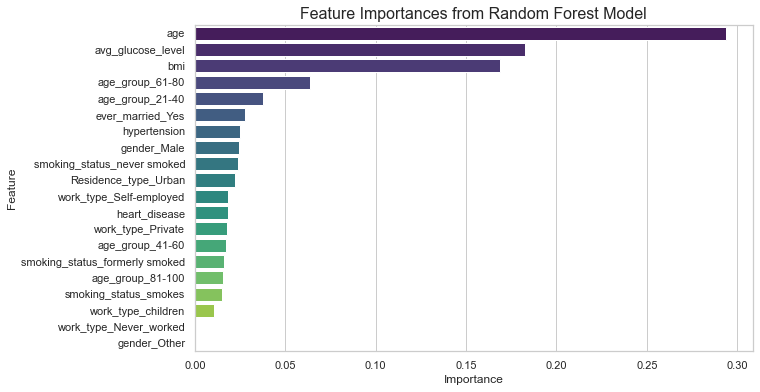

Feature  Importance
0                           age    0.293960
3             avg_glucose_level    0.182666
4                           bmi    0.168619
18              age_group_61-80    0.063677
16              age_group_21-40    0.037966
7              ever_married_Yes    0.027870
1                  hypertension    0.025163
5                   gender_Male    0.024640
14  smoking_status_never smoked    0.023915
12         Residence_type_Urban    0.022015

In [78]:
# Extracting feature importances from the Random Forest model
rf_model = models["Random Forest"]
feature_importances = pd.DataFrame({
    'Feature': X_balanced.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importances from Random Forest Model", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Displaying the top feature importances
feature_importances.head(10)


Feature Importance Analysis:
    
The Random Forest model identifies the following features as most important for predicting strokes:
Age:
The strongest predictor of stroke.

Average Glucose Level:
A critical feature related to health conditions.

BMI (Body Mass Index):
Significantly impacts stroke predictions.

Age Group (61–80):
This specific age bracket contributes notably to predictions.

Age Group (21–40):
Indicates that younger individuals still have some risk factors.

Ever Married (Yes):
Marital status adds to the prediction, possibly as a proxy for lifestyle or healthcare access.

Hypertension:
A well-known stroke risk factor.

Gender (Male):
Slightly impacts predictions.

Smoking Status (Never Smoked):
Indicates health behaviors influencing stroke likelihood.

Residence Type (Urban):
Minimal but still relevant.

Observations:
The top three features (age, glucose levels, BMI) align with known medical risk factors for strokes, adding validity to the model's predictions.

In [79]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for both models on the balanced dataset
cv_results = {}

for model_name, model in models.items():
    # Cross-validation with 5 folds
    scores = cross_val_score(model, X_balanced, y_balanced, cv=5, scoring='accuracy')
    cv_results[model_name] = {
        "Mean Accuracy": scores.mean(),
        "Standard Deviation": scores.std()
    }

# Display cross-validation results
cv_results


{'Logistic Regression': {'Mean Accuracy': 0.7937666486823871,
  'Standard Deviation': 0.01051335149737718},
 'Random Forest': {'Mean Accuracy': 0.9912571540406445,
  'Standard Deviation': 0.0010267445741359385}}

# Cross-Validation Results:

1-Logistic Regression:
Mean Accuracy: 79.38%
Standard Deviation: 1.05%
Performance is stable but slightly lower compared to the training-test evaluation.

2-Random Forest:
Mean Accuracy: 99.13%
Standard Deviation: 0.10%
Consistently high performance across folds, but the small standard deviation suggests potential overfitting.

Observations:
Logistic Regression shows balanced generalization and could be a robust choice.
Random Forest achieves very high accuracy, but further external validation may be needed to confirm it's not overfitting